# Week 6 Problem Set

## Hudson Arney

In [46]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

### Problem 1: Logistic Regression Decision Boundaries

1. $\frac{1}{P(y = 1 | x)} = 1 + e^{-(-20.96 - 123.08x_1 + 40.46x_2)}$

    $-20.96 - 123.08x_1 + 40.46x_2 = 0$

    $40.46x_2 = 20.96 + 123.08x_1$

    $x_2 = \frac{123.08x_1}{40.46} + \frac{20.96}{40.46}$

    $x_2 = 3.042x_1 + 0.518$

2. $\frac{1}{P(y = 1 | x)} = 1 + e^{-(259.55 − 27.15x_1 − 30.49x_2)}$

    $259.55 − 27.15x_1 − 30.49x_2 = 0$

    $-30.49x_2 = -259.55 + 27.15x_1$

    $x_2 = \frac{27.15x_1}{-30.49} + \frac{-259.55}{-30.49}$

    $x_2 = -0.891x_1 + 8.513$

3. $\frac{1}{P(y = 1 | x)} = 1 + e^{-(−26.7 − 284.7x_1 + 284.9x_2 − 64.6x_3)}$

    $−26.7 − 284.7x_1 + 284.9x_2 − 64.6x_3 = 0$

    $64.6x_3 = −26.7 − 284.7x_1 + 284.9x_2$

    $x_3 = \frac{284.9x_2}{64.6} + \frac{-284.7x_1}{64.6} + \frac{-26.7x_1}{64.6}$

    $x_3 = 4.410x_2 - 4.407x_1 - 0.413$

In [47]:
def line_equation_1(x1):
    return (123.08/40.46) * x1 + (20.96/40.46)

In [48]:
def line_equation_2(x1):
    return (27.15/-30.49) * x1 + (-259.55/-30.49)

In [49]:
def plane_equation_3(x1, x2):
    return (-26.7 - 284.7*x1 + 284.9*x2) / 64.6

In [50]:
x1_values = np.linspace(-10, 10, 100)

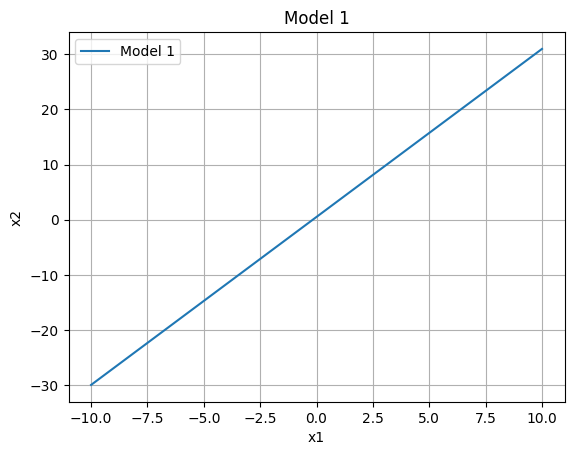

In [51]:
plt.plot(x1_values, line_equation_1(x1_values), label='Model 1')
plt.title('Model 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.legend()


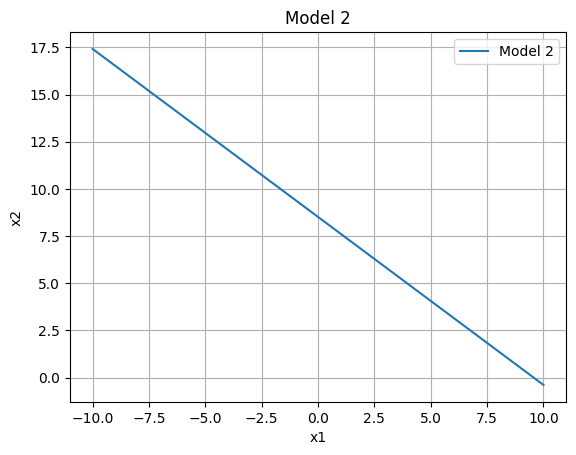

In [52]:
plt.plot(x1_values, line_equation_2(x1_values), label='Model 2')
plt.title('Model 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.legend()

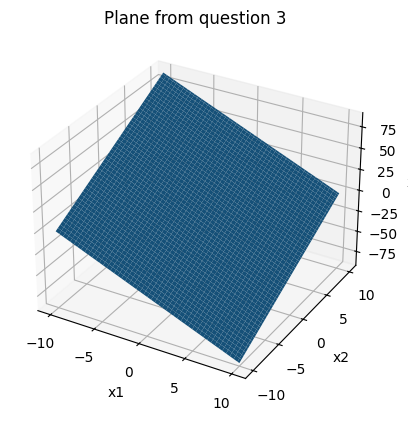

In [53]:
x1_values = np.linspace(-10, 10, 100)
x2_values = np.linspace(-10, 10, 100)
x1_grid, x2_grid = np.meshgrid(x1_values, x2_values)
x3_values = plane_equation_3(x1_grid, x2_grid)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_grid, x2_grid, x3_values)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('Plane from question 3')
plt.show()

### Problem 2: Likelihood

$ P(y = 1) $ | $ y $ | Per-Sample Likelihood
--- | --- | ---
0.99 | 1 | 0.99
0.99 | 1 | 0.99
0.01 | 0 | 0.99
0.01 | 0 | 0.99
0.99 | 1 | 0.99

We can calculate the likelihood for each sample:

For sample 1:
$ L_1 = (0.99)^1 \times (1 - 0.99)^{1 - 1} = (0.99)^1 \times (0.01)^0 = 0.99 $

For sample 2:
$ L_2 = (0.99)^1 \times (1 - 0.99)^{1 - 1} = (0.99)^1 \times (0.01)^0 = 0.99 $

For sample 3:
$ L_3 = (0.01)^0 \times (1 - 0.01)^{1 - 0} = (0.01)^0 \times (0.99)^1 = 0.99 $

For sample 4:
$ L_4 = (0.01)^0 \times (1 - 0.01)^{1 - 0} = (0.01)^0 \times (0.99)^1 = 0.99 $

For sample 5:
$ L_5 = (0.99)^1 \times (1 - 0.99)^{1 - 1} = (0.99)^1 \times (0.01)^0 = 0.99 $

Now, for the overall likelihood, we multiply the per-sample likelihoods:

$$ \text{Overall likelihood} = L_1 \times L_2 \times L_3 \times L_4 \times L_5 = 0.99 \times 0.99 \times 0.99 \times 0.99 \times 0.99 = 0.9509900499 $$
___________________

| P(y=1) | y | Per-Sample Likelihood |
|--------|---|-----------------------|
|  0.01  | 1 |          0.01         |
|  0.01  | 1 |          0.01         |
|  0.99  | 0 |          0.01         |
|  0.99  | 0 |          0.01         |
|  0.01  | 1 |          0.01         |

When all of the model’s estimated probabilities are consistent with the true class:

$L_i = P(y(i) = 1 | x(i))^{y(i)} \times (1 - P(y(i) = 1 | x(i)))^{1 - y(i)}$


For sample 1:
$L_1 = (0.99)^0 \times (1 - 0.99)^{1 - 0} = (0.01)^1 = 0.01$

For sample 2:
$ L_2 = (0.99)^0 \times (1 - 0.99)^{1 - 0} = (0.01)^1 = 0.01 $

For sample 3:
$ L_3 = (0.01)^1 \times (1 - 0.01)^{1 - 1} = (0.01)^1 \times (0.99)^0 = 0.01 $

For sample 4:
$ L_4 = (0.01)^1 \times (1 - 0.01)^{1 - 1} = (0.01)^1 \times (0.99)^0 = 0.01 $

For sample 5:
$ L_5 = (0.99)^0 \times (1 - 0.99)^{1 - 0} = (0.01)^1 = 0.01 $

Now, for the overall likelihood, we multiply the per-sample likelihoods:

$$\text{Overall likelihood} = L_1 \times L_2 \times L_3 \times L_4 \times L_5 = 0.01 \times 0.01 \times 0.01 \times 0.01 \times 0.01 = 0.0000000001 $$

_______________________________________________________________________

| P(y=1) | y | Per-Sample Likelihood |
|--------|---|-----------------------|
|  0.75  | 1 |          0.75         |
|  0.99  | 1 |          0.99         |
|  0.25  | 0 |          0.75         |
|  0.01  | 0 |          0.99         |
|  0.99  | 1 |          0.99         |

For sample 1:
$L_1 = (0.75)^1 \times (1 - 0.75)^{1 - 1} = 0.75$

For sample 2:
$L_2 = (0.99)^1 \times (1 - 0.99)^{1 - 1} = 0.99$

For sample 3:
$L_3 = (0.25)^0 \times (1 - 0.25)^{1 - 0} = 0.75$

For sample 4:
$L_4 = (0.01)^0 \times (1 - 0.01)^{1 - 0} = 0.99$

For sample 5:
$L_5 = (0.99)^1 \times (1 - 0.99)^{1 - 1} = 0.99$

Now, for the overall likelihood, we multiply the per-sample likelihoods:

$$ \text{Overall likelihood} = L_1 \times L_2 \times L_3 \times L_4 \times L_5 = 0.75 \times 0.99 \times 0.75 \times 0.99 \times 0.99 \approx 0.546 $$
______________________

- The best possible likelihood value is when all of the model's estimated probabilities are consistent with the true class, resulting in an overall likelihood of $0.951$. 

- The worst possible likelihood value is when none of the model's estimated probabilities are consistent with the true class, yielding an overall likelihood of $0.0000000001$.
​

### Problem 3: Interpretability of Logistic Regression

1.
The change in $y$ is equal to the coefficient $β_1$ ​ associated with $x_1$. This implies that increasing $x_1$​ by 1 unit results in a change in $y$ equal to $β_1$, assuming all other factors remain constant.

2.
$$\frac{P(y=1∣x)}{P(y=1∣x)} ​= \frac{\frac{1}{−1+ e^{−(b+β_1*​x_1 + β_2*x_2 ​+ … + β_m ​ x_m)}}}{\frac{1}{1 + e^{−(b+β_1*x_1 ​ +β_2*x_2 ​ + … +β_m ​ x_m)}}}$$ 

​Simplifying the expression, we get: 
$$\frac{P(y=1∣x)}{P(y=1∣x)} ​= e^{b+β_1*​x_1 + β_2*x_2 ​+ … + β_m ​ x_m}$$


Now, if we keep all features constant and increase $x_1$​ by 1 unit, the ratio of the probabilities $\frac{P(y=1∣x)}{P(y=1∣x)}$ ​ changes by a factor of $e^{β_1}$, assuming all other features are held constant.

3.
If the features are standardized, and we increase the unscaled version of the first feature by 1 unit, the odds change by a factor of $e^{β_1}$, where $β_1$​ is the coefficient associated with the first feature in the logistic regression model. This implies that the odds increase by a factor of $e^{β_1}$​ for every one-unit increase in the unscaled version of $x_1$, assuming all other features remain constant.

Interpretation of the weight for **Gender**: 
- For every one-unit increase in the "Gender" feature (from male to female), the odds of heart failure versus no heart failure decrease by a factor of $e^{−0.23}$. 


Interpretation of the weight for **Creatinine**: 
- For every one-unit increase in the serum creatinine level (in mg/dL), the odds of heart failure versus no heart failure increase by a factor of $e^{0.6723}$. 

### Problem 4: Growing Trees and the Gini Index

a. 

**Case 1: All data points in a region belong to class 1**
- Since all data points belong to class 1, there is perfect purity. Therefore, the Gini index is 0.

**Case 2: All data points in a region belong to class 0**
- Similar to Case 1, since all data points belong to class 0, there is perfect purity. The Gini index is also 0.

**Case 3: Half of the data points in a region belong to class 1**
$$1−(0.5)^2−(0.5)^2$$
$$=1−0.25−0.25$$
$$=0.5$$

- The Gini index for this case is 0.5, indicating maximum impurity.

b.

In [54]:
def gini_index(prop_class_1):
    prop_class_0 = 1 - prop_class_1
    gini = 1 - (prop_class_0 ** 2) - (prop_class_1 ** 2)
    return gini

In [55]:
cigs_df = pd.read_csv('ciggies.csv')
cigs_df.head()

,cigsPerDay,prevalentHyp,TenYearCHD
0,0,True,0
1,0,True,1
2,0,True,0
3,0,True,1
4,3,False,1


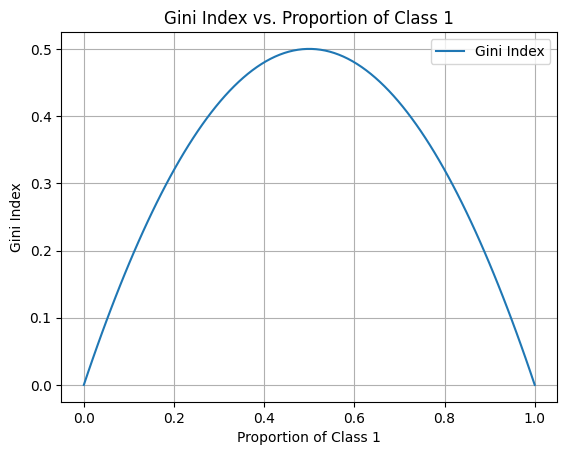

In [56]:
proportions = np.linspace(0, 1, 100)
gini_values = [gini_index(prop) for prop in proportions]

plt.plot(proportions, gini_values, label='Gini Index')
plt.xlabel('Proportion of Class 1')
plt.ylabel('Gini Index')
plt.title('Gini Index vs. Proportion of Class 1')
plt.grid(True)
plt.legend()
plt.show()

1.
a.

In [57]:
class_counts = cigs_df['TenYearCHD'].value_counts()
total_data_points = class_counts.sum()
prop_class_0 = class_counts[0] / total_data_points
prop_class_1 = class_counts[1] / total_data_points
gini_index_overall = 1 - (prop_class_0 ** 2) - (prop_class_1 ** 2)

print("Gini Index for the overall dataset:", gini_index_overall)

Gini Index for the overall dataset: 0.48


b.

In [58]:
R1 = cigs_df[cigs_df['prevalentHyp'] == True]
R2 = cigs_df[cigs_df['prevalentHyp'] == False]

In [59]:
prop_class_1_R1 = R1['TenYearCHD'].mean()
prop_class_1_R2 = R2['TenYearCHD'].mean()

In [60]:
gini_index_R1 = gini_index(prop_class_1_R1)
gini_index_R2 = gini_index(prop_class_1_R2)


In [61]:
N_R1 = len(R1)
N_R2 = len(R2)

In [62]:
weighted_avg_gini_index = (N_R1 / (N_R1 + N_R2)) * gini_index_R1 + (N_R2 / (N_R1 + N_R2)) * gini_index_R2

print("Gini Index for Region 1:", gini_index_R1)
print("Gini Index for Region 2:", gini_index_R2)
print("Weighted Average Gini Index:", weighted_avg_gini_index)

Gini Index for Region 1: 0.48
Gini Index for Region 2: 0.31999999999999984
Weighted Average Gini Index: 0.3999999999999999


c.

**Threshold = 1.5:**

Gini of R1: 1 - (0.5)(0.5) - (0.5)(0.5) = 1 - 0.25 - 0.25 = 0.5

Gini of R2: 1 - (0.333)(0.333) - (0.667)(0.667) = 1 - 0.111 - 0.444 = 0.444

$ \frac{N_1}{N}G(R_1) + \frac{N_2}{N}G(R_2) = \frac{4}{10}0.5 + \frac{6}{10}0.444 = 0.2 + 0.267 = 0.467 $

**Threshold = 6.5:**

Gini of R1: 1 - (0.6)(0.6) - (0.4)(0.4) = 1 - 0.36 - 0.16 = 0.48

Gini of R2: 1 - (0.2)(0.2) - (0.8)(0.8) = 1 - 0.04 - 0.64 = 0.32

$ \frac{N_1}{N}G(R_1) + \frac{N_2}{N}G(R_2) = \frac{5}{10}0.48 + \frac{5}{10}0.32 = 0.24 + 0.16 = 0.4 $

**Threshold = 15:**

Gini of R1: 1 - (0.5)(0.5) - (0.5)(0.5) = 1 - 0.25 - 0.25 = 0.5

Gini of R2: 1 - (0.25)(0.25) - (0.75)(0.75) = 1 - 0.0625 - 0.5625 = 0.375

$ \frac{N_1}{N}G(R_1) + \frac{N_2}{N}G(R_2) = \frac{6}{10}0.5 + \frac{4}{10}0.375 = 0.3 + 0.15 = 0.45 $

**Threshold = 25:**

Gini of R1: 1 - (0.5)(0.5) - (0.5)(0.5) = 1 - 0.25 - 0.25 = 0.5

Gini of R2: 1 - (0)(0) - (1)(1) = 1 - 0 - 1 = 0

$ \frac{N_1}{N}G(R_1) + \frac{N_2}{N}G(R_2) = \frac{8}{10}0.5 + \frac{2}{10}0 = 0.4 + 0 = 0.4 $

**_Lowest impurity: Threshold of 6.5 and 25 have the lowest average Gini scores._**


d.

The average Gini scores for prevalentHyp, cigsPerDay thresh 6.5 and cigsPerDay thresh 25 were all the same; meaning any of these could be used as the root node. Even though you chould choose any, prevalentHyp seems like the best choice as there is no threshold needed to be declared.

### Problem 5: Given Trees

a.

In [63]:
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
feature_pairs = [('proline', 'color_intensity'), ('flavanoids', 'alcohol'), ('malic_acid', 'ash'), ('alcalinity_of_ash', 'magnesium')]

X = wine_data.data
y = wine_data.target

In [64]:
feature_names = wine_data.feature_names
print(feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


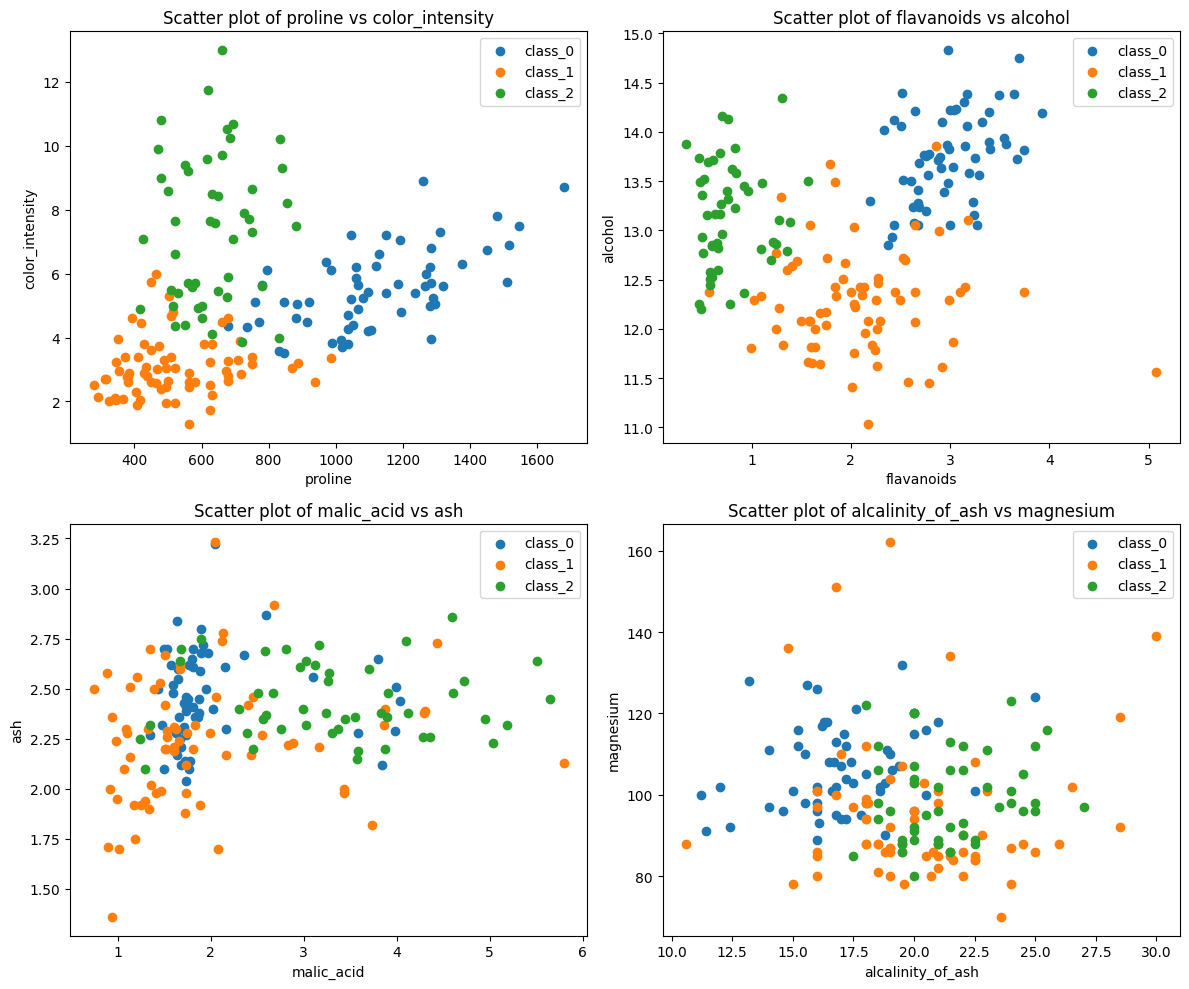

In [65]:
plt.figure(figsize=(12, 10))
for i, pair in enumerate(feature_pairs, 1):
    plt.subplot(2, 2, i)
    for target_class in zip(range(len(wine.target_names))):
        plt.scatter(wine_df[wine_df['target'] == target_class][pair[0]],
                    wine_df[wine_df['target'] == target_class][pair[1]],
                    label=wine.target_names[target_class])
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.title(f'Scatter plot of {pair[0]} vs {pair[1]}')
    plt.legend()

plt.tight_layout()
plt.show()

b.

| Plot Features               | Easily Separable Classes |
|-----------------------------|--------------------------|
| Proline & Color Intensity  | Yes                      |
| Flavanoids & Alcohol       | Yes                      |
| Malic Acid & Ash           | No                       |
| Ash Alcalinity & Magnesium | No                       |

All plots with DT2 have less distinguised clusters than DT1

c. 

In [66]:
X_train = wine_data.data[:, [feature_names.index('proline'), feature_names.index('color_intensity'), feature_names.index('flavanoids'), feature_names.index('alcohol')]]
y_train = wine_data.target

dt1_model = DecisionTreeClassifier(max_depth=3)
dt1_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [67]:
samples = np.array([
    [0.5, 5, 1, 500],
    [0.75, 4.25, 0.75, 525],
    [0, 4, 3, 800]
])

In [68]:
predicted_classes = dt1_model.predict(samples)

print("Predicted Class:")
for i, pred_class in enumerate(predicted_classes):
    print(f"Sample {i+1}: {pred_class}")

Predicted Class:
Sample 1: 2
Sample 2: 2
Sample 3: 1


| Alcohol | Color Intensity | Flavonoids | Proline | Predicted Class |
|---------|-----------------|------------|---------|-----------------|
| 0.5     | 5               | 1          | 500     | Class 2         |
| 0.75    | 4.25            | 0.75       | 525     | Class 2         |
| 0       | 4               | 3          | 800     | Class 1         |


d.

In [69]:
print("\nDecision Paths:")
for i, sample in enumerate(samples):
    node_indicator = dt1_model.decision_path([sample])
    leaf_id = dt1_model.apply([sample])[0]

    # Get the indices of the nodes visited for the current sample
    node_index = node_indicator.indices
    print(f"Sample {i+1}:")

    bool_expr = ""

    # Traverse the decision path
    for node_id in node_index:
        if leaf_id == node_id:
            continue  # Skip leaf node
        if bool_expr:
            bool_expr += " and "

        feature_index = dt1_model.tree_.feature[node_id]
        threshold = dt1_model.tree_.threshold[node_id]

        bool_expr += f"X[{feature_index}] <= {threshold}"

    print(bool_expr)


Decision Paths:
Sample 1:
X[0] <= 755.0 and X[1] <= 4.8500001430511475 and X[2] <= 1.399999976158142
Sample 2:
X[0] <= 755.0 and X[1] <= 4.8500001430511475 and X[2] <= 0.8950000107288361
Sample 3:
X[0] <= 755.0 and X[1] <= 4.8500001430511475 and X[2] <= 0.8950000107288361


e.

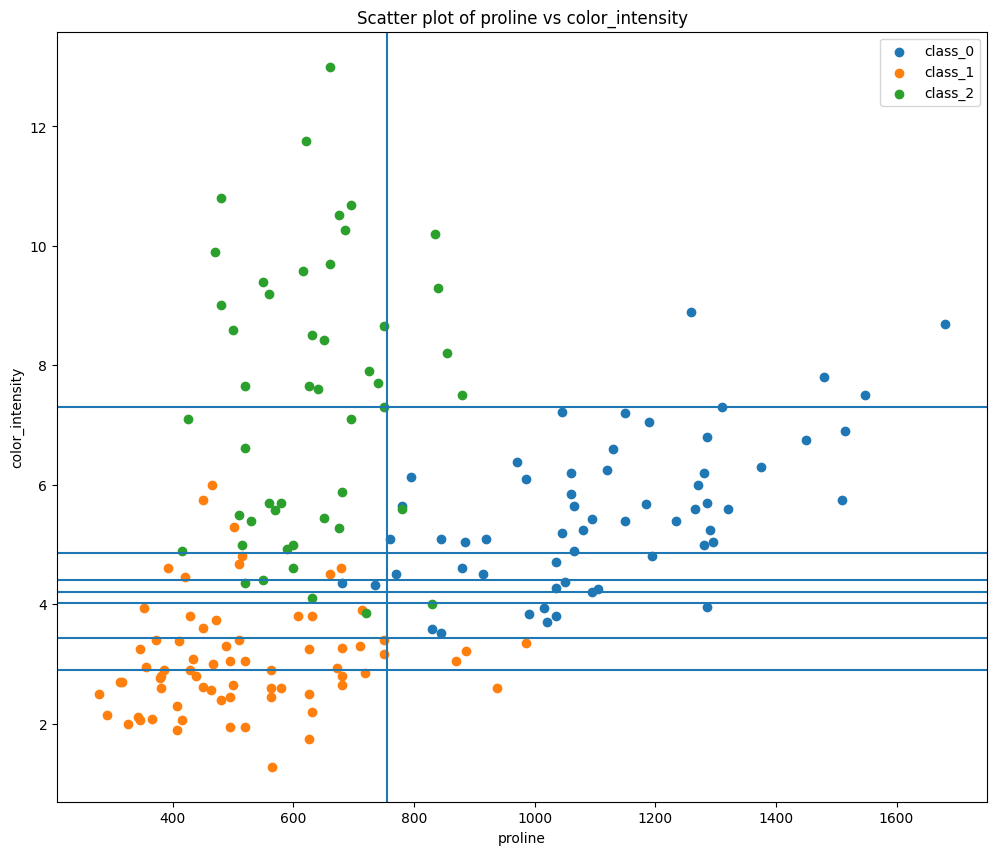

In [70]:
i, pair = 1, feature_pairs[0]
plt.figure(figsize=(12, 10))
for target_class in zip(range(len(wine.target_names))):
    plt.scatter(wine_df[wine_df['target'] == target_class][pair[0]],
                wine_df[wine_df['target'] == target_class][pair[1]],
                label=wine.target_names[target_class])
plt.xlabel(pair[0])
plt.ylabel(pair[1])
plt.title(f'Scatter plot of {pair[0]} vs {pair[1]}')
plt.legend()
xcoords = [755]
for xc in xcoords:
    plt.axvline(x=xc)
ycoords = [4.85, 2.9, 4.405, 4.21, 7.3, 3.435, 4.02]
for yc in ycoords:
    plt.axhline(y=yc)
plt.show()

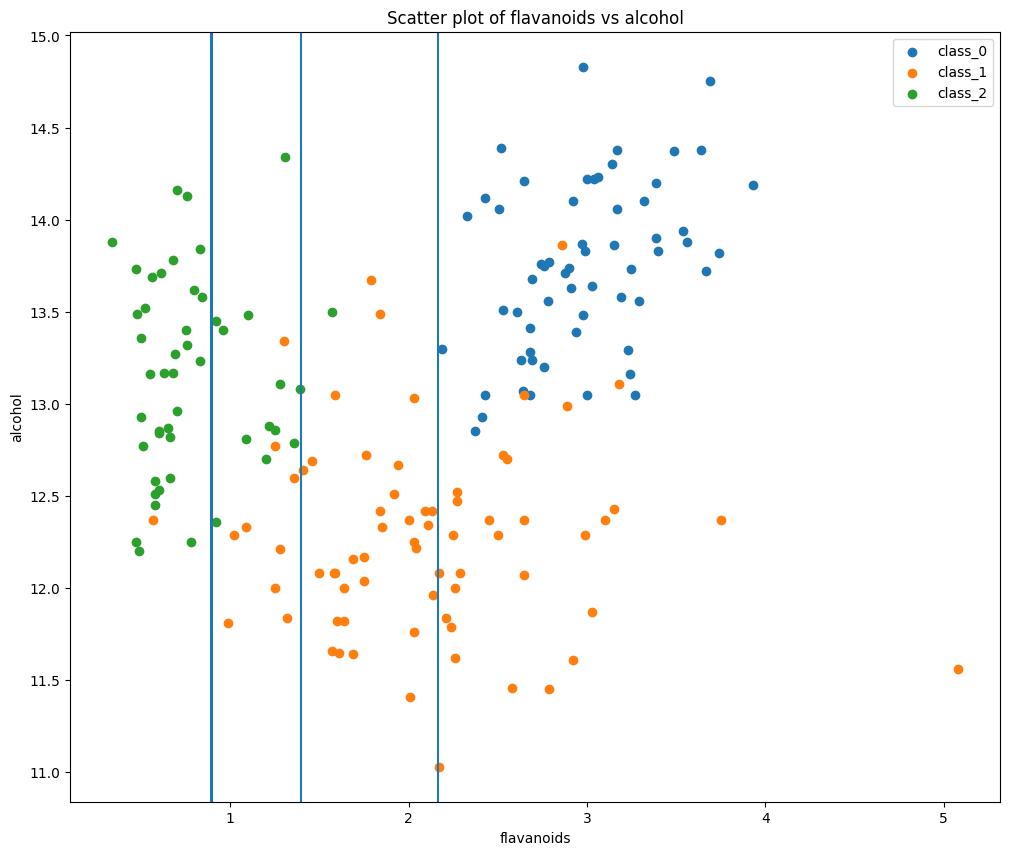

In [71]:
i, pair = 2, feature_pairs[1]
plt.figure(figsize=(12, 10))
for target_class in zip(range(len(wine.target_names))):
    plt.scatter(wine_df[wine_df['target'] == target_class][pair[0]],
                wine_df[wine_df['target'] == target_class][pair[1]],
                label=wine.target_names[target_class])
plt.xlabel(pair[0])
plt.ylabel(pair[1])
plt.title(f'Scatter plot of {pair[0]} vs {pair[1]}')
plt.legend()
xcoords = [.895, 1.4, 2.165, 0.9]
for xc in xcoords:
    plt.axvline(x=xc)
ycoords = []
for yc in ycoords:
    plt.axhline(y=yc)
plt.show()

f.
Due to the limited separability observed in the feature pairs utilized by the second decision tree, it is evident that a larger decision tree is necessary to achieve accurate classification of certain data points within the graph. In contrast, the first decision tree, as depicted in our plot, exhibits minimal decision lines. Despite this, it successfully identifies each training point based solely on these delineations.

g.

Decision Trees can use Random Forests or Gradient Boosting instead of the one vs all scheme used in Logistic Regression. In Random Forests, multiple decision trees are trained independently on different subsets of the data, and the final prediction is made by aggregating the predictions of individual trees through majority voting. Similarly, Gradient Boosting builds decision trees sequentially, with each tree correcting the errors of its predecessors, leading to a strong predictive model.